In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

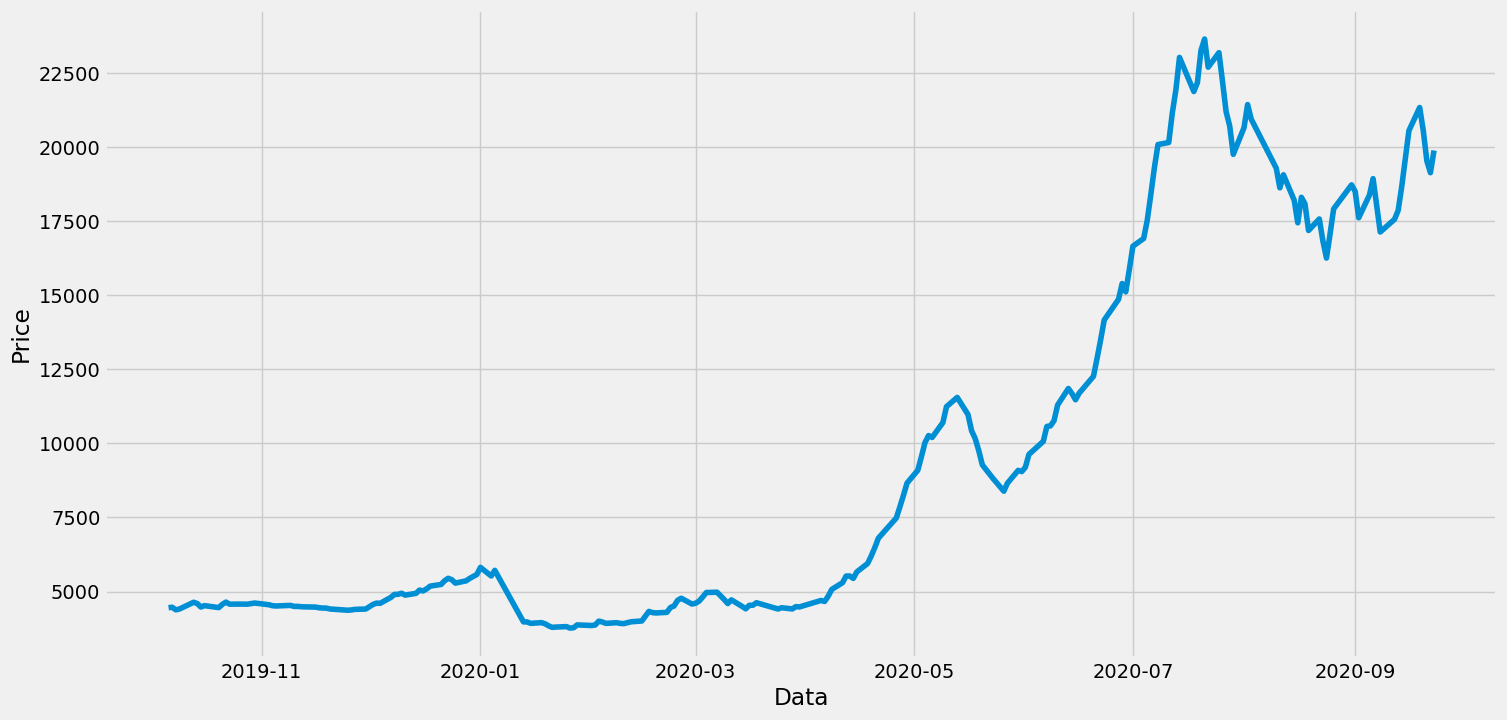

In [17]:
df = pd.read_csv('foolad.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df.tail(220)
plt.figure(figsize=(16,8))
plt.plot(df.index,df['Close'],label = 'Close Price')
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

In [18]:
delta = df['Close'].diff(1)
delta.dropna()

2019-10-07      17.0
2019-10-08     -86.0
2019-10-09      24.0
2019-10-12     174.0
2019-10-13      55.0
               ...  
2020-09-19     780.0
2020-09-20    -780.0
2020-09-21   -1020.0
2020-09-22    -400.0
2020-09-23     750.0
Name: Close, Length: 219, dtype: float64

In [19]:
up = delta.copy()
down = delta.copy()
up[up<0]=0
down[down>0]=0

In [20]:
period = 14
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())
RS = avg_gain/avg_loss
RSI = 100.0-(100.0/(1.0+RS))

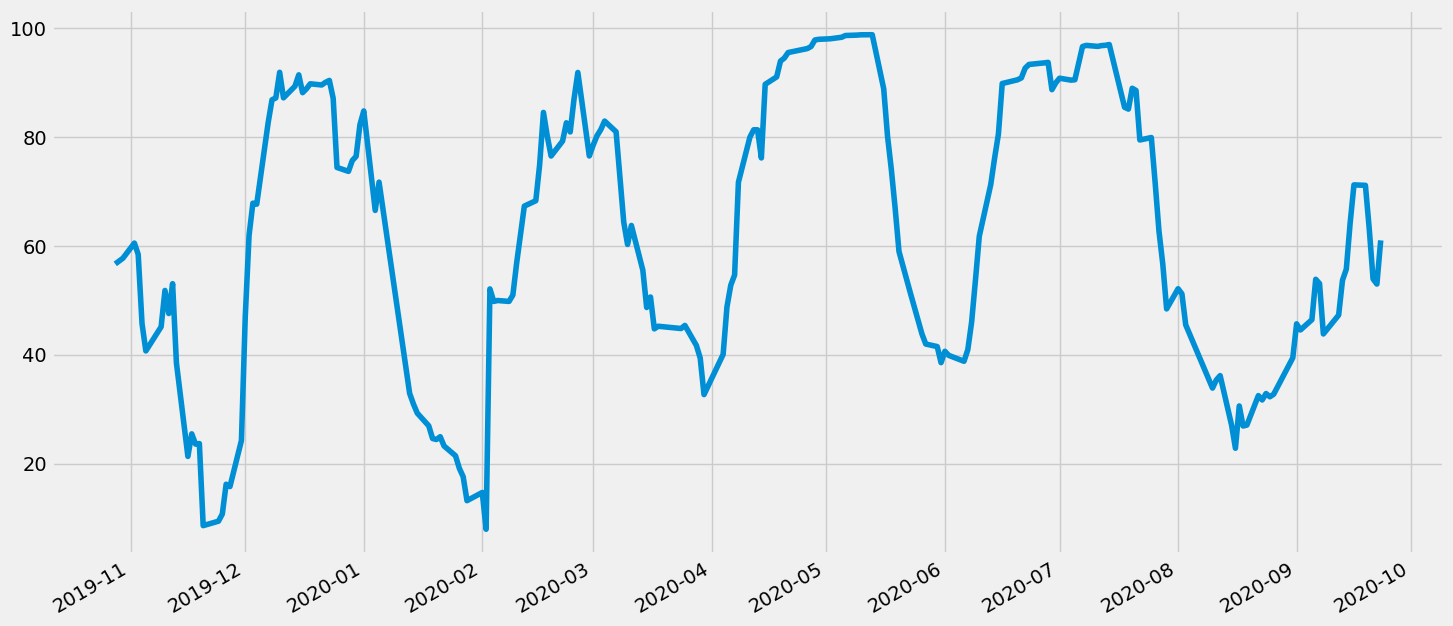

In [21]:
plt.figure(figsize=(16,8))
RSI.plot()
plt.show()

In [22]:
newdf = pd.DataFrame()
newdf['Close'] = df['Close']
newdf['RSI'] = RSI
newdf

Close        RSI
2019-10-06   4453        NaN
2019-10-07   4470        NaN
2019-10-08   4384        NaN
2019-10-09   4408        NaN
2019-10-12   4582        NaN
...           ...        ...
2020-09-19  21330  71.159564
2020-09-20  20550  63.173653
2020-09-21  19530  53.958944
2020-09-22  19130  53.025937
2020-09-23  19880  61.051607

[220 rows x 2 columns]

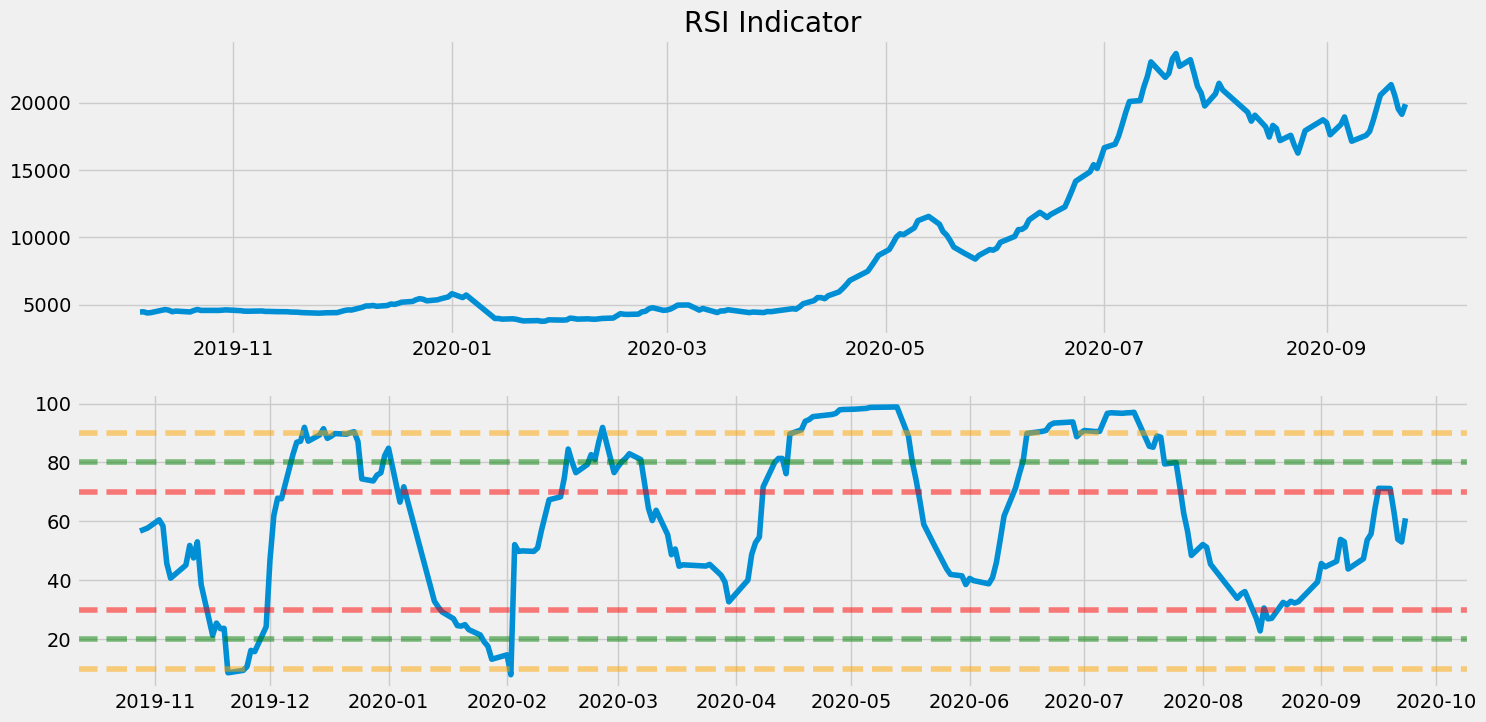

In [28]:
fig , (ax1 , ax2) = plt.subplots(nrows=2 , ncols=1 , figsize=(16,8))
ax1.plot(newdf['Close'],label = 'Close Price')
ax2.plot(newdf['RSI'],label = 'RSI')
ax2.axhline(10,linestyle='--',color='orange',alpha=0.5)
ax2.axhline(20,linestyle='--',color='g',alpha=0.5)
ax2.axhline(30,linestyle='--',color='r',alpha=0.5)
ax2.axhline(70,linestyle='--',color='r',alpha=0.5)
ax2.axhline(80,linestyle='--',color='g',alpha=0.5)
ax2.axhline(90,linestyle='--',color='orange',alpha=0.5)
ax1.set_title('RSI Indicator')
plt.show()